In [ ]:
from clustering import *
from utils import *

In [2]:
#df of log returns
df_5m = pd.read_parquet("data/clean/5m/data_clean_5m_log_ret.parquet")

In [3]:
#Rolling clustering for 5m dataset
#Compute T=3*N
N = df_5m.shape[1]
T = N // 3

#Number of windows possible
lag_max = df_5m.shape[0] - T
liste = RolledCluster(df_5m, T, "louvain_cluster/date/5m", True, False, lag_max)

In [4]:
liste_cluster = dask.compute(dask.compute(liste))[0][0]
#liste_cluster

In [5]:
number_of_clusters = []
for element in liste_cluster:
    number_of_clusters.append(len(element["Cluster"].unique()))

In [6]:
df_n_clusters = pd.DataFrame(number_of_clusters, columns=['Clusters'])
df_n_clusters["Datetime"] = df_5m[-len(df_n_clusters):].index

In [7]:
df_n_clusters

,Clusters,Datetime
0,3,2021-11-12 10:35:00-05:00
1,5,2021-11-12 10:40:00-05:00
2,4,2021-11-12 10:45:00-05:00
3,5,2021-11-12 10:50:00-05:00
4,4,2021-11-12 10:55:00-05:00
...,...,...
3347,4,2022-01-21 15:35:00-05:00
3348,4,2022-01-21 15:40:00-05:00
3349,3,2022-01-21 15:45:00-05:00
3350,4,2022-01-21 15:50:00-05:00


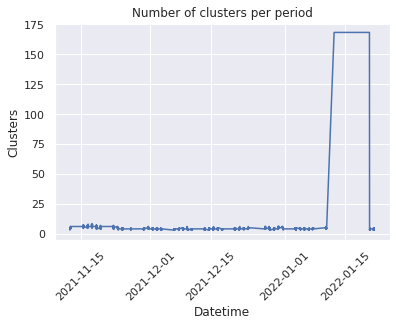

In [26]:
plot(df_n_clusters, x="Datetime", y="Clusters", title='Number of clusters per period', save_name='Plot_number_clusters_days_5m')

In [9]:
df_n_clusters["ARI"] = [1] + RolledARI(liste_cluster)

100%|██████████| 3351/3351 [00:04<00:00, 689.48it/s]


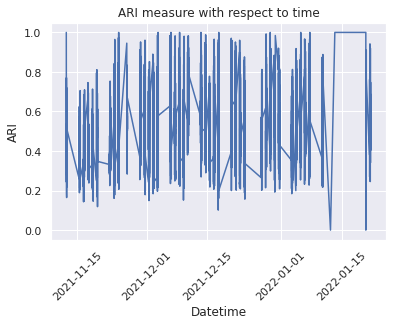

In [27]:
plot(df_n_clusters, x="Datetime", y="ARI", title='ARI measure with respect to time', save_name='Plot_ARI_days_5m')

In [28]:
df_n_clusters['ARI'].mean()

0.5431571012448555

In [11]:
dfj = df_5m.join(liste_cluster[-1], how='inner')

In [12]:
dfj

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,Cluster
2022-01-19 12:10:00-05:00,0.001401,0.002492,0.000961,0.001562,-0.000264,0.001416,0.002062,0.000628,0.001275,0.003882,...,0.001602,-0.000410,0.001481,0.000226,-0.000397,0.002832,0.002338,-0.000447,0.000540,0
2022-01-19 12:15:00-05:00,-0.001963,0.001981,-0.003054,-0.001332,-0.000396,-0.003132,-0.001363,-0.001571,-0.002609,-0.001834,...,0.001754,-0.000683,-0.000694,-0.001767,0.000159,0.001035,0.000000,-0.001642,-0.000982,2
2022-01-19 12:20:00-05:00,0.001402,-0.000284,0.000209,0.001065,-0.000073,0.000373,0.001944,0.002041,0.000738,0.000998,...,0.001494,0.001503,-0.001714,0.001722,-0.000238,-0.000040,-0.002377,-0.000448,0.000393,2
2022-01-19 12:25:00-05:00,-0.000210,0.000567,-0.000901,0.000030,-0.000073,-0.000373,-0.000216,-0.000432,-0.000482,0.001709,...,0.001029,0.000887,0.000556,-0.000408,-0.000318,-0.000995,0.001307,0.000747,-0.000593,1
2022-01-19 12:30:00-05:00,0.000140,-0.004545,-0.001489,-0.000473,-0.000220,-0.000149,0.001775,-0.000797,0.000936,-0.000285,...,-0.000026,-0.001023,-0.000742,-0.000027,-0.000954,-0.001794,0.000538,-0.001048,0.000200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21 15:35:00-05:00,0.001595,0.001391,0.001699,0.000613,-0.000243,-0.000458,0.001726,0.002070,0.001338,0.002732,...,0.004310,0.002502,0.000757,0.002991,0.000928,0.001714,0.001711,0.002985,0.001642,1
2022-01-21 15:40:00-05:00,0.002243,0.001781,-0.000102,0.000123,0.002649,0.003845,0.002526,0.001669,-0.000016,-0.000943,...,0.000818,0.001110,0.002644,0.002609,0.002176,0.001330,0.001568,0.000567,0.000673,2
2022-01-21 15:45:00-05:00,0.000434,-0.000758,0.002678,0.000000,0.000906,0.000798,0.000033,0.002063,0.000877,-0.001928,...,0.002370,0.000277,0.000943,0.000744,0.000845,-0.000311,0.000331,0.001295,0.000321,0
2022-01-21 15:50:00-05:00,-0.003872,-0.001690,-0.002390,-0.003315,-0.002873,-0.002890,-0.001738,-0.001586,-0.003896,-0.006167,...,-0.012173,0.000347,-0.002642,-0.005409,-0.000322,-0.002407,-0.008974,-0.003322,-0.000845,0


In [13]:
dfj = dfj.groupby(by='Cluster').mean().T

In [14]:
asset_details = pd.read_csv('tickers/s&p.csv', index_col=0)
asset_details

,Name,Sector
Symbol,,
MMM,3M,Industrials
AOS,A. O. Smith,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie,Health Care
ABMD,Abiomed,Health Care
...,...,...
YUM,Yum! Brands,Consumer Discretionary
ZBRA,Zebra Technologies,Information Technology
ZBH,Zimmer Biomet,Health Care


In [15]:
dfj = dfj.join(asset_details[['Sector']], how='inner')
dfj

,0,1,2,Sector
A,-0.000461,-0.000005,-0.000125,Health Care
AAL,-0.000567,0.000149,-0.000697,Industrials
AAP,-0.000366,-0.000086,-0.000463,Consumer Discretionary
AAPL,-0.000423,-0.000257,-0.000039,Information Technology
ABBV,-0.000268,0.000092,-0.000342,Health Care
...,...,...,...,...
YUM,-0.000233,0.000084,-0.000051,Consumer Discretionary
ZBH,-0.000032,-0.000744,0.000173,Health Care
ZBRA,-0.000723,-0.000587,0.000282,Information Technology
ZION,-0.000215,-0.000337,-0.000849,Financials


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

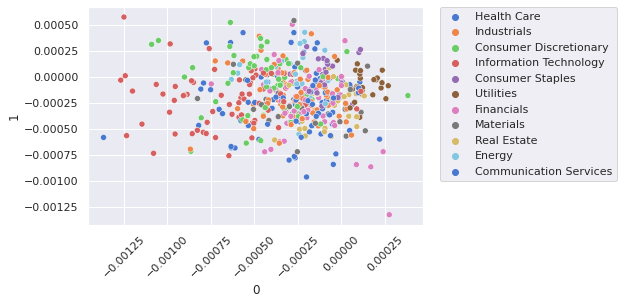

In [17]:
ax = sns.scatterplot(data=dfj, x=0, y=1, hue='Sector', palette='muted')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

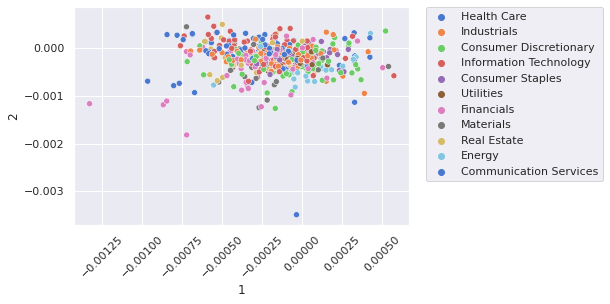

In [18]:
ax = sns.scatterplot(data=dfj, x=1, y=2, hue='Sector', palette='muted')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

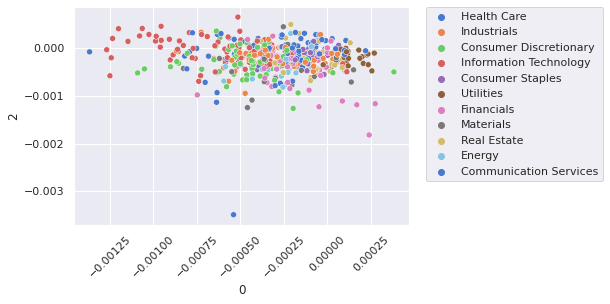

In [19]:
ax = sns.scatterplot(data=dfj, x=0, y=2, hue='Sector', palette='muted')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

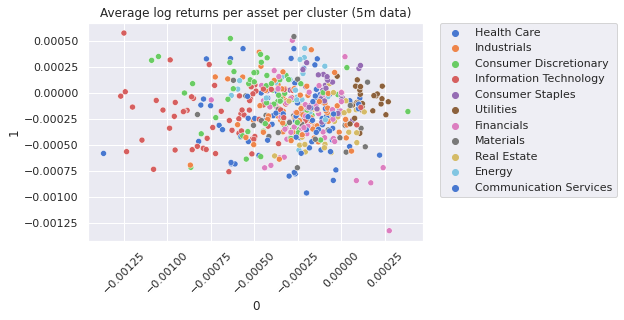

In [23]:
plot_scatter(df=dfj, x=0, y=1, hue='Sector', title='Average log returns per asset per cluster (5m data)', save_name='5m_cluster_ret_0_1')

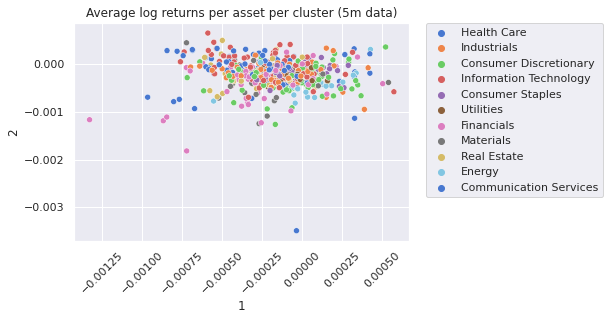

In [24]:
plot_scatter(df=dfj, x=1, y=2, hue='Sector', title='Average log returns per asset per cluster (5m data)', save_name='5m_cluster_ret_1_2')

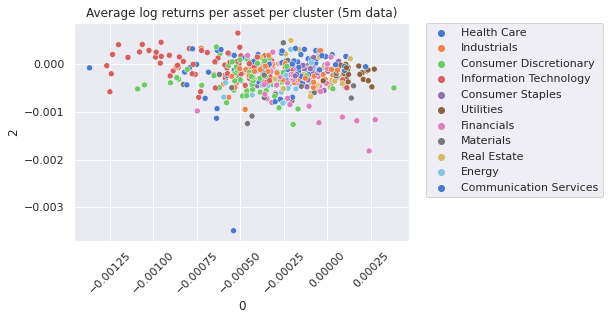

In [25]:
plot_scatter(df=dfj, x=0, y=2, hue='Sector', title='Average log returns per asset per cluster (5m data)', save_name='5m_cluster_ret_0_2')